# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [2]:
# Question 1 code here
df = pd.read_csv('framingham.csv').dropna()
# For this assignment, we are dropping any rows that have missing data.
# THIS IS GENERALLY A BAD IDEA. We will discuss alternatives later in the course.
df.head()
#df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [3]:
# Question 2 code here.

# Don't use the "TenYearCHD" as a feature
X = df.drop('TenYearCHD', axis='columns')
y = df.TenYearCHD.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size=0.5, 
                                                random_state=0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** *Yes, it uses L2 penalty by default.*
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** *We expect the coefficients to be smaller if a penalty is applied.*
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** *A column of 1s should not be included because by default sklearn estimates an intercept. Or, the intercept could be turned off in the function and a column of 1s included*


## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

<Axes: >

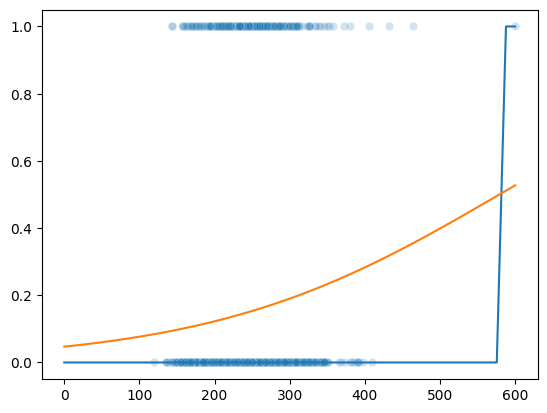

In [4]:
# Question 4 code here.
# Assign appropriate values to xscater, yscatter (x and y coordinates for scatter plot)
# xline (x coordinates for plot of prediction)
# yline_label (y coordinates for plot of predicted label)
# yline_prob (y coordinates for plot of predicted probability)

LOGREG_TOTCHOL = LogisticRegression(solver='lbfgs',penalty = None)
column_name = 'totChol'
XtraintotChol = Xtrain[[column_name]].values
XtesttotChol = Xtest[[column_name]].values
lr_totChol = LOGREG_TOTCHOL.fit(XtraintotChol,ytrain)
xp=np.linspace(0,max(XtesttotChol),50)
yp1=lr_totChol.predict(xp)
yp2=lr_totChol.predict_proba(xp)

xscatter=XtesttotChol[:,0]
yscatter = ytest
xline = xp[:,0]
yline_label = yp1
yline_prob = yp2[:,1]

# Plotting code
# xscatter, yscatter, xline, yline1, yline2 must all be 1D arrays
ax = sns.scatterplot(x=xscatter,y=yscatter,alpha=0.2) #Plot data
sns.lineplot(x=xline,y=yline_label) # Plot line indicating label
sns.lineplot(x=xline,y=yline_prob) # Plot line indicating probability

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** *1 test instance is labeled positive.*

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** *The postive-labeled example has a very large value for totChol. Because the coefficient for totChol is positive, the product of the two plus the intercept is greater than 0 (probability greater than 0.5) so the example is labeled positive.*

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

**YOUR ANSWER HERE:** *Since the classifier has no ability to find positives it is not useful for identifying future CHD cases. ALSO ACCEPT: It might be useful if we used a different threshold.*

In [5]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
    
ytest_hat = lr_totChol.predict(XtesttotChol)
compute_performance(ytest_hat, ytest, lr_totChol.classes_)

## Put code here to compute whatever else you might need to answer the question.

print(f"Coefficient for totChol: {lr_totChol.coef_}")

print(f"Value of totChol for positive example: {XtesttotChol[ytest_hat > 0]}")


tp: 1 tn: 1538 fp: 0 fn: 289
Accuracy: 0.842 Recall: 0.003 Precision: 1.0 Sensitivity: 0.003 Specificity: 1.0
Coefficient for totChol: [[0.00519351]]
Value of totChol for positive example: [[600.]]


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

**YOUR ANSWER HERE:** *Larger values of totChol are less associated with CHD according to this model if all other variables are held equal.*

In [6]:
# Code for Question 6

LOGREG = LogisticRegression(solver='lbfgs',penalty = None,max_iter=10000)
lr_all = LOGREG.fit(Xtrain,ytrain)
lr_all.coef_

array([[ 5.12874010e-01,  6.24575022e-02, -1.46258050e-03,
         9.37218092e-02,  1.50827571e-02,  6.00907126e-01,
         6.31789632e-01,  1.22381422e-01, -3.92794831e-01,
         1.88429671e-03,  1.68788556e-02,  1.21725316e-04,
         1.42577280e-03, -3.77727861e-03,  9.43674839e-03]])

## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** *tp + fp = 24+22 = 46 are labeled positive.*

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

**YOUR ANSWER:** *Since the classifier has more true positives, it is more useful than the previous classifier for finding future CHD cases.*

In [7]:
# Code for Question 7

ytest_hat_all = lr_all.predict(Xtest)
compute_performance(ytest_hat_all, ytest, lr_all.classes_)

tp: 24 tn: 1516 fp: 22 fn: 266
Accuracy: 0.842 Recall: 0.083 Precision: 0.522 Sensitivity: 0.083 Specificity: 0.986


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** *The AUROC gives the probability that a + is correctly distinguished from a -.*

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** *Logistic regression optimizes likelihood, not AUROC. It is possible that a logistic regression classifier could perform worse than random in terms of AUROC.*


0.5730426886686696

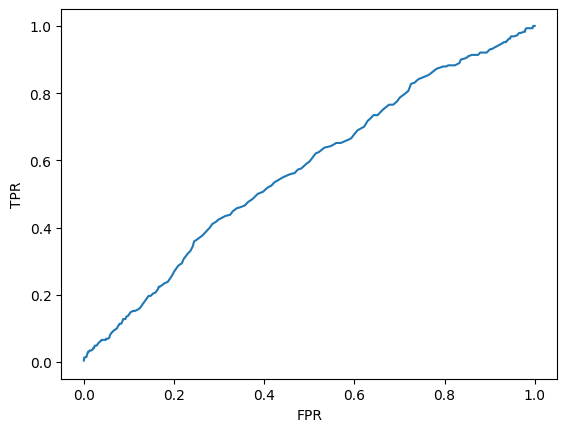

In [8]:
# ROC for totChol-only classifier
ytest_prob_totChol = lr_totChol.predict_proba(XtesttotChol)
fpr, tpr, _ = roc_curve(ytest, ytest_prob_totChol[:,1], pos_label=1)
ax=sns.lineplot(x=fpr,y=tpr)
ax.set(xlabel="FPR",ylabel="TPR")
auc(fpr,tpr)

0.7370857809066859

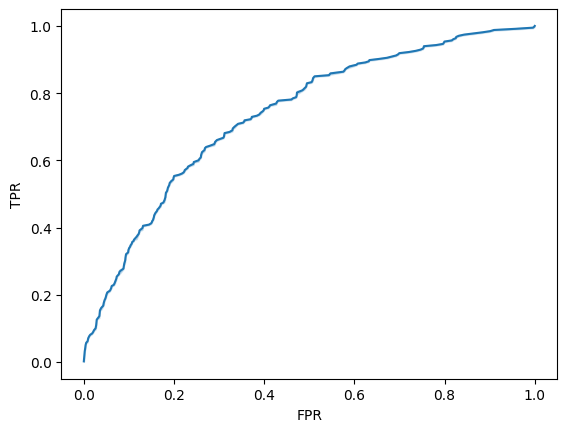

In [9]:
# ROC for all-variable classifier
ytest_prob = lr_all.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1], pos_label=1)
ax=sns.lineplot(x=fpr,y=tpr)
ax.set(xlabel="FPR",ylabel="TPR")
auc(fpr,tpr)

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

**YOUR ANSWER:** *The model with all variables has a precision of about 0.4 at 0.2 recall, and the amount-only classifier has precision almost 0.2 at 0.2 recall, so the model with all variables is preferable.*


[Text(0.5, 0, 'Recall'), Text(0, 0.5, 'Precision')]

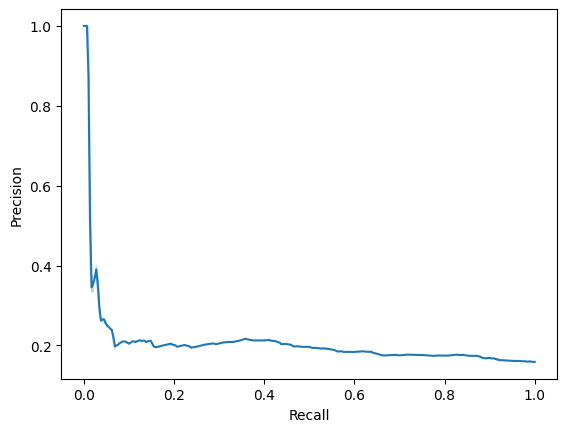

In [10]:
# ROC for totChol-only classifier
ytest_prob_totChol = lr_totChol.predict_proba(XtesttotChol)
precision, recall, _ = precision_recall_curve(ytest, ytest_prob_totChol[:,1], pos_label=1)
ax=sns.lineplot(x=recall,y=precision)
ax.set(xlabel="Recall",ylabel="Precision")

[Text(0.5, 0, 'Recall'), Text(0, 0.5, 'Precision')]

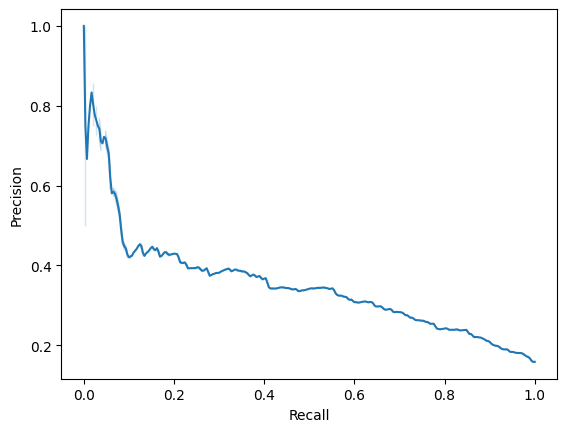

In [11]:
# PRC for all-variable classifier
ytest_prob = lr_all.predict_proba(Xtest)
precision, recall, _ = precision_recall_curve(ytest, ytest_prob[:,1], pos_label=1)
ax=sns.lineplot(x=recall,y=precision)
ax.set(xlabel="Recall",ylabel="Precision")